# Testing time marching in package `Whirl`

In [1]:
include(joinpath(Pkg.dir("Dyn3d"), "src/Dyn3d.jl"))
using Dyn3d
include(joinpath(Pkg.dir("Whirl"), "src/Whirl.jl"))
using Whirl

In [2]:
using Plots
pyplot()
clibrary(:colorbrewer)
default(grid = false)

### Purely 2-d diffusion from a circle, which is constrained system with integrating factor

In [3]:
nx = 129; ny = 129;
Lx = 2.0;
dx = Lx/(nx-2);
w = Nodes(Dual,(nx,ny));

In [4]:
n = 128;
θ = linspace(0,2π,n+1);
R = 0.5;
xb = 1.0 + R*cos.(θ[1:n])
yb = 1.0 + R*sin.(θ[1:n])
ds = (2π/n)*R;
X = VectorData(xb,yb);
f = ScalarData(X);

In [5]:
E = Regularize(X,dx;ddftype=Fields.Roma,issymmetric=true)
Hmat, Emat = RegularizationMatrix(E,f,w);

In [6]:
plan_constraints(u::Nodes{Dual,nx,ny},t::Float64) = Hmat, Emat

plan_constraints (generic function with 1 method)

In [7]:
Whirl.TimeMarching.r₁(w::Nodes{T,NX,NY},t::Float64) where {T,NX,NY} = Nodes(T,w)
Whirl.TimeMarching.r₂(w::Nodes{T,NX,NY},t::Float64) where {T,NX,NY} = ScalarData(ones(length(f)))

In [8]:
Δt = 0.01
ifherk = IFHERK(w,f,Δt,plan_intfact,plan_constraints,(r₁,r₂),rk=RK31)

Order-3+ IF-HERK integrator with
   State of type Whirl.Fields.Nodes{Whirl.Fields.Dual,129,129}
   Force of type Whirl.Fields.ScalarData{128}
   Time step size 0.01


In [9]:
@time ifherk.S[1].B₂A⁻¹(w)
@time ifherk.S[1].S*f;
@time ifherk.S[1].A⁻¹B₁ᵀ(f);

  0.018099 seconds (529 allocations: 191.710 KiB)
  0.018259 seconds (33 allocations: 450.172 KiB)
  0.012601 seconds (32 allocations: 289.063 KiB)


In [10]:
@time ifherk(0.0,w)

  4.480806 seconds (340.61 k allocations: 236.428 MiB, 0.77% gc time)


(0.01, Whirl.Fields.Dual nodes in a (nx = 129, ny = 129) cell grid
  Number of Whirl.Fields.Dual nodes: (nx = 129, ny = 129), 128 points of scalar-valued data
)

In [11]:
t = 0.0
w = Nodes(Dual,(nx,ny));

In [12]:
@time for i = 1:50
    t,w,f = ifherk(t,w);
end

180.990520 seconds (815.98 k allocations: 10.887 GiB, 0.67% gc time)


In [13]:
w.data[65,30:40]

11-element Array{Float64,1}:
 0.0190855  
 0.110761   
 0.460076   
 1.14455    
 0.826561   
 0.252182   
 0.0512657  
 0.00765947 
 0.000897275
 8.61091e-5 
 6.9838e-6  

In [14]:
f

128 points of scalar-valued data
 -2.13742
 -2.09086
 -2.08116
 -2.05936
 -2.16781
 -2.17253
 -2.06074
 -2.22579
 -2.1486 
 -2.08788
 -2.2755 
 -2.18148
 -2.12985
  ⋮      
 -2.12985
 -2.18148
 -2.2755 
 -2.08788
 -2.1486 
 -2.22579
 -2.06074
 -2.17253
 -2.16781
 -2.05936
 -2.08116
 -2.09086

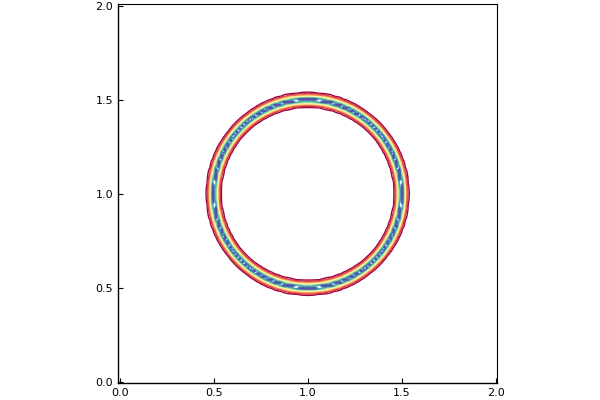

/home/julia/JuliaPro-0.6.2.2/JuliaPro/pkgs-0.6.2.2/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)


In [15]:
xg, yg = coordinates(w,dx=dx)
plot(xg,yg,w)

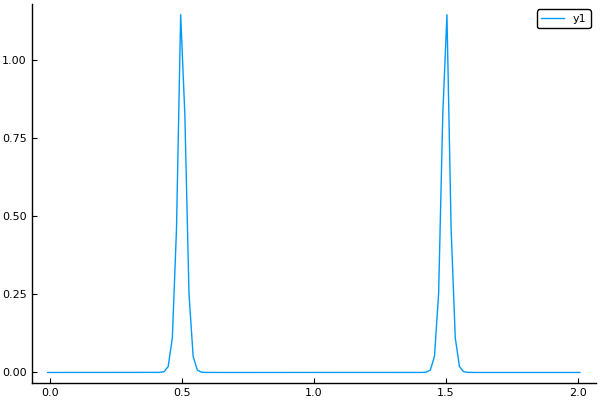

In [16]:
plot(xg,w[65,:])

### 2-d diffusion from a circle with heat source

In [ ]:
nx = 129; ny = 129;
Lx = 2.0;
dx = Lx/(nx-2);
w = Nodes(Dual,(nx,ny));

In [ ]:
n = 128;
θ = linspace(0,2π,n+1);
R = 0.5;
xb = 1.0 + R*cos.(θ[1:n])
yb = 1.0 + R*sin.(θ[1:n])
ds = (2π/n)*R;
X = VectorData(xb,yb);
f = ScalarData(X);

In [ ]:
E = Regularize(X,dx;ddftype=Fields.Roma,issymmetric=true)
Hmat, Emat = RegularizationMatrix(E,f,w);

In [ ]:
plan_constraints(u::Nodes{Dual,nx,ny},t::Float64) = Hmat, Emat

In [ ]:
Whirl.TimeMarching.r₁(w::Nodes{T,NX,NY},t::Float64) where {T,NX,NY} = Nodes(T,w)
Whirl.TimeMarching.r₂(w::Nodes{T,NX,NY},t::Float64) where {T,NX,NY} = ScalarData(ones(length(f)))

In [ ]:
Δt = 0.01
ifherk = IFHERK(w,f,Δt,plan_intfact,plan_constraints,(r₁,r₂),rk=RK31)

In [ ]:
@time ifherk(0.0,w)

In [ ]:
t = 0.0
w = Nodes(Dual,(nx,ny));
w.data[[65,66,65,66],[40,40,90,90]] .= 2.0; 

In [ ]:
@time for i = 1:200
    t,w,f = ifherk(t,w);
    w.data[[65,66,65,66],[40,40,90,90]] .= 2.0; 
end

In [ ]:
w.data[65,30:40]

In [ ]:
w.data[65,60:70]

In [ ]:
xg, yg = coordinates(w,dx=dx)
plot(xg,yg,w)

In [ ]:
plot(xg,w[65,:])